       H    S  Count
0      0    0   2520
1      0   10    149
2      0   20    237
3      0   30    326
4      0   40    352
..   ...  ...    ...
298  170  120      1
299  170  140      2
300  170  150      1
301  170  170      1
302  170  200      1

[303 rows x 3 columns]


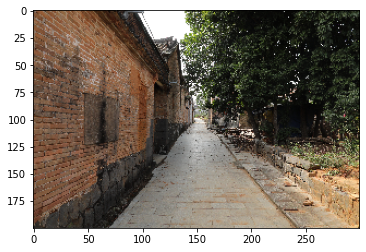

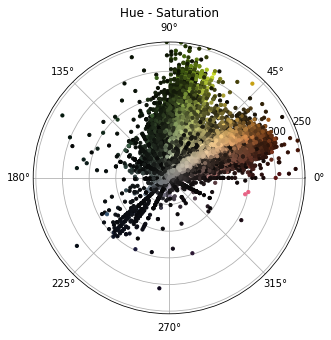

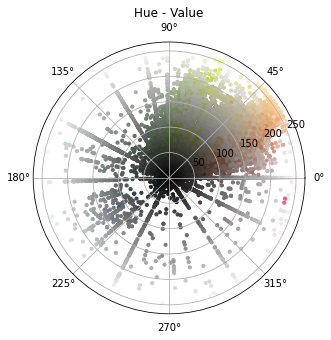

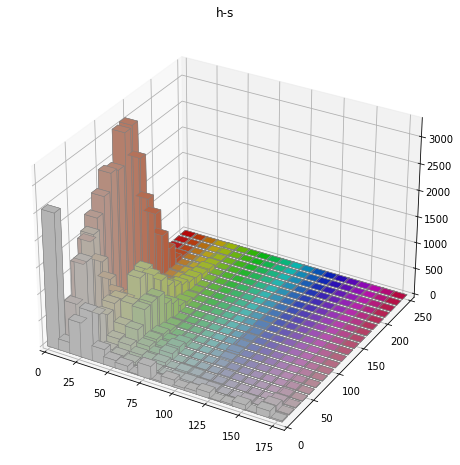

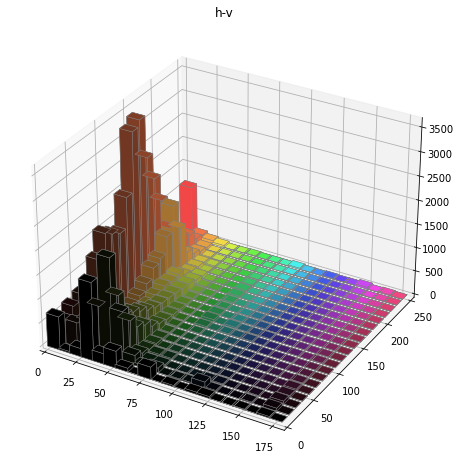

In [110]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
from scipy.stats import gaussian_kde

def show_img(path):

    img = cv2.imread(path)
    img = cv2.resize(img,(300,200))
    plt.imshow(img[:,:,::-1])
    rgbimg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    hsvimg = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = hsvimg[:,:,0], hsvimg[:,:,1], hsvimg[:,:,2]

    colorDF = pd.DataFrame({"H":(h.flatten()/10).astype(int)*10,"S":(s.flatten()/10).astype(int)*10,"V":(v.flatten()/10).astype(int)*10})
    colorDF= colorDF.groupby(["H","S"])["V"].count().reset_index(name="Count")
    print(colorDF)
    colorDF["H"]

    
    
    fig = plt.figure(figsize=(5, 5))
    ax=plt.subplot(111,projection="polar")
    ax.set_title("Hue - Saturation")
    ax.set_ylim(0,255)
    ax.set_axisbelow('True')  # 使散点覆盖在坐标系之上
    """
    ax.set_thetagrids(np.arange(0.0, 360.0, 15.0))
    ax.set_thetamin(0.0)  # 设置极坐标图开始角度为0°
    ax.set_thetamax(360.0)  # 设置极坐标结束角度为180°
    ax.set_rgrids(np.arange(0, 255.0, 100.0))
    ax.set_rlabel_position(0.0)  # 标签显示在0°
    ax.set_rlim(0.0, 360.0)  # 标签范围为[0, 360)
    
    ax.grid(True, linestyle="-", color="k", linewidth=0.5, alpha=0.5)"
    """ 

    h2=np.asarray(h,dtype="float")
    plt.scatter(h2.flatten()*2*math.pi/178.0, s.flatten(), s=10.0,c=rgbimg.reshape(-1,3)/255.0)
    plt.show()

    fig = plt.figure(figsize=(5, 5))
    ax=plt.subplot(111,projection="polar")
    ax.set_title("Hue - Value")
    plt.scatter(h2.flatten()*2*math.pi/178.0, v.flatten(), s=10.0,c=rgbimg.reshape(-1,3)/255.0)
    plt.show()

    plot2dhistogram(h.flatten(),s.flatten(),"h-s")
    plot2dhistogram(h.flatten(),v.flatten(),"h-v")



def plot2dhistogram(x,y,tag):
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(projection='3d')

    
    hist, xedges, yedges = np.histogram2d(x, y, bins=20, range=[[0, 179], [0, 255]])

    # Construct arrays for the anchor positions of the 16 bars.
    xpos, ypos = np.meshgrid(xedges[:-1], yedges[:-1], indexing="ij")
    xpos = xpos.ravel()
    ypos = ypos.ravel()
    zpos = 0

    # Construct arrays with the dimensions for the 16 bars.
    dx = dy = 10* np.ones_like(zpos)
    dz = hist.ravel()
    if(tag=="h-s"):
        colors=np.array(list(zip(xpos, ypos,180*np.ones_like(xpos))),dtype="uint8").reshape(-1,1,3)
    elif(tag=="h-v"):
        colors=np.array(list(zip(xpos,180*np.ones_like(xpos),ypos)),dtype="uint8").reshape(-1,1,3)
    
    colors=cv2.cvtColor(colors, cv2.COLOR_HSV2RGB)
    
    #colors=np.array([(x,y,z) for x in xedges/179 for y in yedges/255])
    
    ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort="max",color=colors/255.0,shade=False,edgecolor="gray",linewidth=0.5)
    ax.set_title(tag)
    ax.margins(0)

    plt.show()

show_img(r"E:\Downloads\BaiduNetdiskDownload\testfile\2L7A2046.JPG")
#show_img(r"E:\Downloads\BaiduNetdiskDownload\output\2L7A2046_kmeans.png")


In [18]:
import numpy as np
import cv2 

from matplotlib import colors
import matplotlib.pyplot as plt
import colour


class ImageAnalysis:
    
    
    # rgb 表达方式转化
    def ColorDistribution2(image):
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            modified_img = image.reshape(image.shape[0]*image.shape[1], 3)
            hexcolorlist=[]
            for i in range(len(modified_img)):
                #去掉黑色
                if (ImageAnalysis.rgb_to_hex(modified_img[i]) != "#000000"):
                    hexcolorlist.append(ImageAnalysis.rgb_to_hex(modified_img[i]))

            unique,counts=np.unique(hexcolorlist,return_counts=True)

            return (unique,counts)
        
    def rgb_to_hex(rgb_color):
        hex_color = "#"
        for i in rgb_color:
            num = int(i)
            #hex_color += ("{:02x}".format(i))
            hex_color += str(hex(num))[-2:].replace("x","0").upper()
        return hex_color
    
    def hex_to_rgb(hex):
        hex = hex.lstrip('#')
        r= int(hex[0:2],16)
        g= int(hex[2:4],16)
        b= int(hex[4:6],16)
        rgb = [r,g,b]
        return rgb

    def hexrgb2munsell(hex):
        rgb=ImageAnalysis.hex_to_rgb(hex)

        unitrgb=[]
        for element in rgb:
             unitrgb.append(element/255.0)

        XYZ = colour.sRGB_to_XYZ(unitrgb)
        xyY = colour.XYZ_to_xyY(XYZ)
        munsell = colour.xyY_to_munsell_colour(xyY)
        return munsell

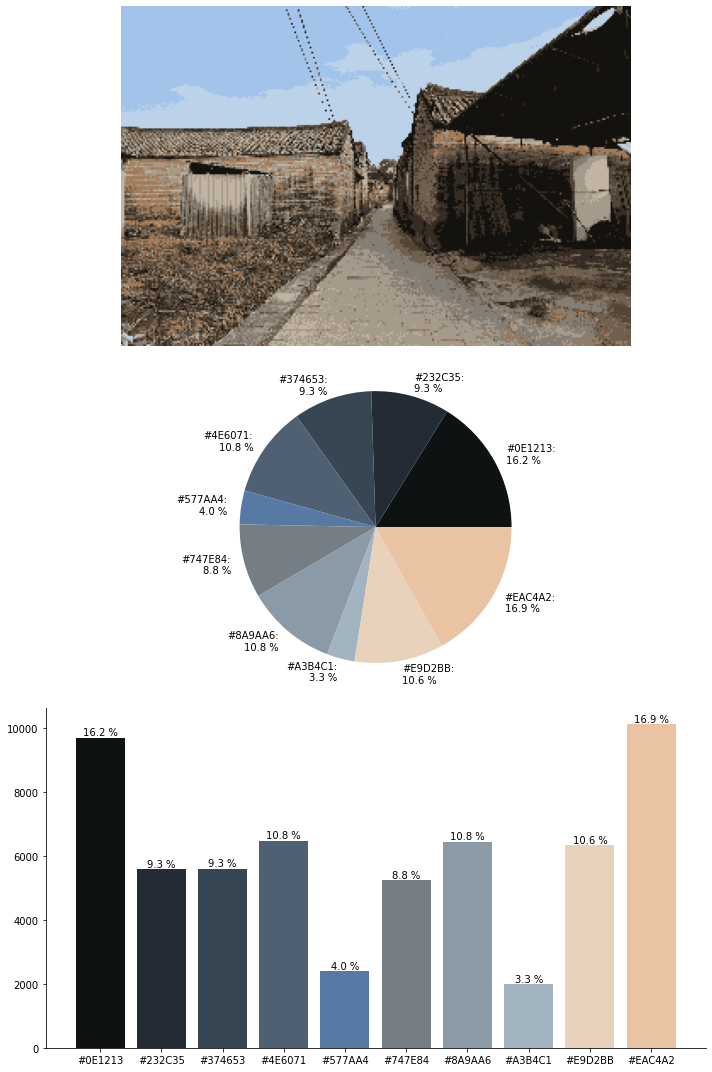

In [64]:
import matplotlib.pyplot as plt
import numpy as np



image = cv2.imread(r"E:\Downloads\BaiduNetdiskDownload\output\2L7A2000_kmeans.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)




hexcolorlist,counts=ImageAnalysis.ColorDistribution2(image)
"""
munsells=[]
for hexcolor in hexcolorlist:
    munsells.append(ImageAnalysis.hexrgb2munsell(hexcolor))
"""

percentages = counts / counts.sum() * 100

fig, ((ax1, ax2,ax3)) = plt.subplots(ncols=1, nrows=3, figsize=(10, 15))

ax1.imshow(image)
ax1.axis('off')

color_labels = [f'{label}:\n{perc:.1f} %' for label, perc in zip(hexcolorlist, percentages)]
ax2.pie(counts, labels=color_labels, colors=hexcolorlist)

bars = ax3.bar(hexcolorlist.astype(str), counts, color=hexcolorlist)
ax3.bar_label(bars, [f'{perc:.1f} %' for perc in percentages])
for spine in ['top', 'right']:
    ax3.spines[spine].set_visible(False)

plt.tight_layout()
plt.show()

In [38]:
import colour
rgb = [.9,.1,.1]
XYZ = colour.sRGB_to_XYZ(rgb)
xyY = colour.XYZ_to_xyY(XYZ)
munsell = colour.xyY_to_munsell_colour(xyY)
print(munsell)


7.9R 4.8/17.6
